# Analysis II

In this thesis that I am preparing is another method for analyzing the importance of hyperparameter. In this method, my new aproach is considering the below assumption:
##### Assumtion
* Why not the Data Base of `Hyperparameter` that will be turned in by the BD team be itself considered as a Individual Dataset - This approach is called as building a `Surrogate Model`
* The dataset will consist of MetaData, Algorithm, Leaderboard(collected from H2O), Hyperparameter for the respective Algorithms 
All arranged as a columns with it's corresponding respective values in it. Now, this I am going o use it to build a model around it.
Below are the columns, which are dummy as far now, as I have built it individually according to my assumptions. The DB team is yet to turn in it's DataBase, I am waiting for the good model amongst what they turn in to be considered for my thesis - to build a model.

The columns that I have taken till now are as below with it's description:

* runid	- Run id for a dataset and its iteration
* dataset	- The dataset and its link from where it's being fetched
* problem	- if it is a classification/regression
* runtime	- runtime for which H2O was run on this dataset
* columns	- number of columns in the dataset
* rows	- number rows in the dataset
* tags	- What genre it belongs to
* algo	- algorithm applied on this dataset by H2O
* model_id	- the model id generated
* ntree	- value for n_estimator
* max_depth	- value for the hyperaparameter
* learn_rate	- value for the hyperaparameter
* mean_residual_deviance	- value for the hyperaparameter
* rmse	- value for the metric
* mse	- value for the metric
* mae	- value for the metric
* rmsle - value for the metric




In [1]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [2]:
h2o.init(min_mem_size_GB=2)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\prabh\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\prabh\AppData\Local\Temp\tmp33tc56wy
  JVM stdout: C:\Users\prabh\AppData\Local\Temp\tmp33tc56wy\h2o_prabh_started_from_python.out
  JVM stderr: C:\Users\prabh\AppData\Local\Temp\tmp33tc56wy\h2o_prabh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,06 secs
H2O cluster version:,3.12.0.1
H2O cluster version age:,"1 year, 10 months and 16 days !!!"
H2O cluster name:,H2O_from_python_prabh_qlz1p8
H2O cluster total nodes:,1
H2O cluster free memory:,3.512 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [3]:
df = h2o.import_file('./hyperparamter_db_test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


This dataset is created on own, and the data are not true. This is just t test the thesis and the hypothesis to check if this will give us a good analysis results

In [4]:
df.head()

runid,dataset,problem,runtime,columns,rows,tags,algo,model_id,ntree,max_depth,learn_rate,mean_residual_deviance,rmse,mse,mae,rmsle
5asd5as4d,PUBG,regression,700,10,4000,Game,GBM,XGBoost_3_AutoML_20190418_140346,20,4,0.1,0.196366,0.443132,0.196366,0.195467,0.0793003
5a4sd65as4d6,PUBG,regression,55,10,4000,Game,GLM,XGBoost_3_AutoML_20190418_140347,30,5,0.2,0.202491,0.44999,0.202491,0.202766,0.0795664
as5d4as65d4,PUBG,regression,555,10,4000,Game,GBM,XGBoost_3_AutoML_20190418_140348,44,4,0.3,0.205276,0.453074,0.205276,0.206034,0.0810562
3asd32sd,PUBG,regression,345,10,4000,Game,DRF,XGBoost_3_AutoML_20190418_140349,58,4,0.1,0.216875,0.465698,0.216875,0.217555,0.0878519
as54d3sa5d4,PUBG,regression,12132,10,4000,Game,XRT,XGBoost_3_AutoML_20190418_140350,56,4,0.5,0.216875,0.465698,0.216875,0.217555,0.0878519
32asd432,PUBG,regression,12132,10,4000,Game,GBM,XGBoost_3_AutoML_20190418_140351,20,4,0.6,0.219316,0.468312,0.219316,0.219897,0.0844326
7sd89f7sd9f8,PUBG,regression,12132,10,4000,Game,GBM,XGBoost_3_AutoML_20190418_140352,30,5,0.6,0.219609,0.468625,0.219609,0.219726,0.0845298
68a7eea68we7,PUBG,regression,12132,10,4000,Game,GLM,XGBoost_3_AutoML_20190418_140353,44,5,0.6,0.2224,0.471593,0.2224,0.223829,0.085251
56sa4a65sfsd,PUBG,regression,12132,10,4000,Game,DRF,XGBoost_3_AutoML_20190418_140354,44,5,0.6,0.251938,0.501934,0.251938,0.228844,0.101846
8d6f71gdf8g7,PUBG,regression,12132,10,4000,Game,GBM,XGBoost_3_AutoML_20190418_140355,44,5,0.6,0.255272,0.505244,0.255272,0.232563,0.10153


I am running for a simple AutoML runtime of 100 seconds. The results will be better if I run for more time.

In [5]:
aml = H2OAutoML(max_runtime_secs=100)

In [6]:
X=df.columns

Below are the predictors we have considered

In [7]:
X = ['runid',
 'dataset',
 'problem',
 'runtime',
 'columns',
 'rows',
 'tags',
 'model_id',
 'ntree',
 'max_depth',
 'learn_rate',
 'mean_residual_deviance',
 'rmse',
 'mse',
 'mae',
 'rmsle']
y='algo'

In [8]:
aml.train(x=X,y=y,training_frame=df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


C:\Users\prabh\Anaconda3\lib\site-packages\h2o\utils\shared_utils.py:162: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


On running H2O AutoML for 100 seconds, for this simple Surrogate Dataset, we are getting 68 models generated by H2O

In [9]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
aml_leaderboard_df

,model_id,mean_per_class_error
0,GBM_grid_0_AutoML_20190423_134333_model_32,0.3750
1,GBM_grid_0_AutoML_20190423_134333_model_26,0.3750
2,GBM_grid_0_AutoML_20190423_134333_model_163,0.3750
3,GBM_grid_0_AutoML_20190423_134333_model_44,0.3750
4,GBM_grid_0_AutoML_20190423_134333_model_121,0.3750
5,GBM_grid_0_AutoML_20190423_134333_model_164,0.3750
6,GBM_grid_0_AutoML_20190423_134333_model_151,0.3750
7,GBM_grid_0_AutoML_20190423_134333_model_75,0.4375
8,GBM_grid_0_AutoML_20190423_134333_model_16,0.4375
9,GBM_grid_0_AutoML_20190423_134333_model_91,0.4375


In [10]:
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
mod_best

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_0_AutoML_20190423_134333_model_32


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.005379815592386542
RMSE: 0.07334722620785698
LogLoss: 0.07493269418958665
Mean Per-Class Error: 0.0
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



DRF,GBM,GLM,XRT,Error,Rate
5.0,0.0,0.0,0.0,0.0,0 / 5
0.0,5.0,0.0,0.0,0.0,0 / 5
0.0,0.0,4.0,0.0,0.0,0 / 4
0.0,0.0,0.0,4.0,0.0,0 / 4
5.0,5.0,4.0,4.0,0.0,0 / 18


Top-4 Hit Ratios: 


k,hit_ratio
1,1.0
2,1.0
3,1.0
4,1.0



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.5268810268937705
RMSE: 0.7258657085809815
LogLoss: 1.4345686366266095
Mean Per-Class Error: 0.625
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



DRF,GBM,GLM,XRT,Error,Rate
1.0,0.0,1.0,0.0,0.5,1 / 2
0.0,0.0,2.0,0.0,1.0,2 / 2
0.0,0.0,0.0,1.0,1.0,1 / 1
0.0,0.0,0.0,1.0,0.0,0 / 1
1.0,0.0,3.0,2.0,0.6666667,4 / 6


Top-4 Hit Ratios: 


k,hit_ratio
1,0.3333333
2,0.5
3,0.6666667
4,1.0



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.6656194567740119
RMSE: 0.8158550464230836
LogLoss: 1.9184586420915157
Mean Per-Class Error: 0.8375
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



DRF,GBM,GLM,XRT,Error,Rate
0.0,0.0,1.0,4.0,1.0,5 / 5
0.0,2.0,2.0,1.0,0.6,3 / 5
2.0,2.0,0.0,0.0,1.0,4 / 4
3.0,0.0,0.0,1.0,0.75,3 / 4
5.0,4.0,3.0,6.0,0.8333333,15 / 18


Top-4 Hit Ratios: 


k,hit_ratio
1,0.1666667
2,0.3888889
3,0.6111111
4,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.1833333,0.1840894,0.25,0.0,0.0,0.0,0.6666667
err,0.8166667,0.1840894,0.75,1.0,1.0,1.0,0.3333333
err_count,3.0,0.7745967,3.0,4.0,4.0,3.0,1.0
logloss,1.8879164,0.363785,1.8407123,2.1300786,2.242718,2.3150065,0.9110671
max_per_class_error,1.0,0.0,1.0,1.0,1.0,1.0,1.0
mean_per_class_accuracy,0.375,0.1369306,0.375,0.25,0.25,0.25,0.75
mean_per_class_error,0.625,0.1369306,0.625,0.75,0.75,0.75,0.25
mse,0.6541083,0.1348162,0.6364173,0.7407884,0.79232,0.8087318,0.2922840
r2,0.3350991,0.2194902,-0.2728345,0.3761782,0.5304771,0.480101,0.5615739
rmse,0.7977,0.0942947,0.7977576,0.8606907,0.8901236,0.8992952,0.540633


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2019-04-23 13:44:09,19.702 sec,0.0,0.75,1.3862944,0.8333333,0.75,1.3862944,0.1666667
,2019-04-23 13:44:09,19.731 sec,5.0,0.5801327,0.8679379,0.0,0.7307343,1.3328758,0.6666667
,2019-04-23 13:44:09,19.759 sec,10.0,0.4494943,0.5966390,0.0,0.7250897,1.3359994,0.6666667
,2019-04-23 13:44:09,19.788 sec,15.0,0.3413619,0.4164137,0.0,0.7278660,1.3683082,0.6666667
,2019-04-23 13:44:09,19.818 sec,20.0,0.2455676,0.2805005,0.0,0.7248919,1.3677229,0.6666667
,2019-04-23 13:44:09,19.846 sec,25.0,0.1836482,0.2011819,0.0,0.7254468,1.3979571,0.6666667
,2019-04-23 13:44:09,19.876 sec,30.0,0.1313657,0.1394543,0.0,0.7224946,1.4015841,0.6666667
,2019-04-23 13:44:09,19.905 sec,35.0,0.0959472,0.0994113,0.0,0.7244438,1.4327802,0.6666667
,2019-04-23 13:44:09,19.930 sec,39.0,0.0733472,0.0749327,0.0,0.7258657,1.4345686,0.6666667


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
runid,23.8859978,1.0,0.2075956
ntree,13.2216721,0.5535323,0.1149109
rmse,12.1622152,0.5091776,0.1057030
mae,9.5844069,0.4012563,0.0832990
learn_rate,9.1856413,0.3845618,0.0798333
mean_residual_deviance,8.9648123,0.3753166,0.0779141
mse,8.6185074,0.3608184,0.0749043
runtime,6.7384105,0.2821071,0.0585642
rmsle,5.0836511,0.2128298,0.0441825
max_depth,5.0434976,0.2111487,0.0438335


##### Now, what we perform here is important and is going to give us a definite result for our analysis. Something called Variable importance is brought into the picture to analysis our thesis.


##### `Variable importance is an indication of which predictors are most useful for predicting the response variable. Various measures of variable importance have been proposed in the data mining literature. The most important variables might not be the ones near the top of the tree.`


Below is something that H2O turns in when one of the models except `StackedEnsemble` is called


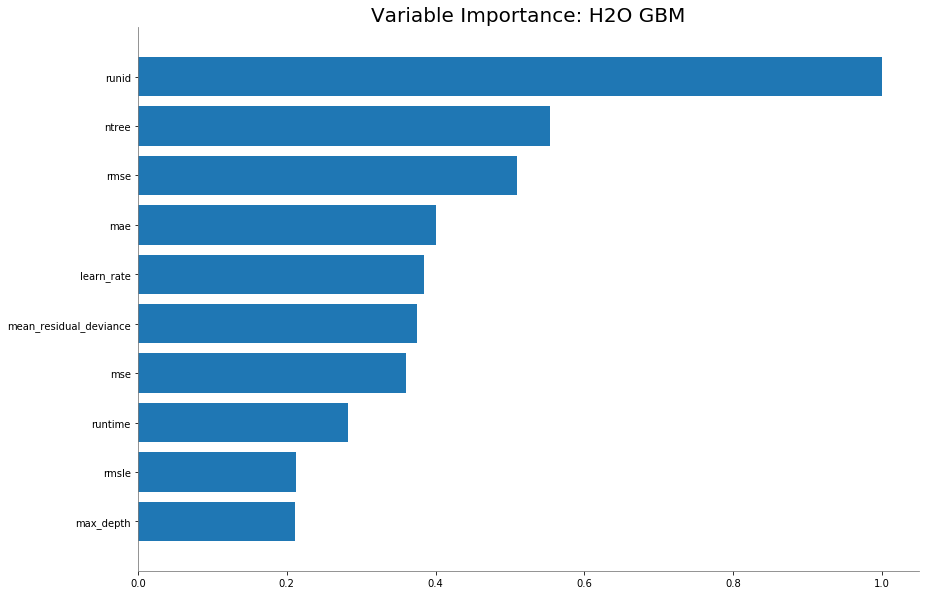

In [11]:
mod_best.varimp_plot()

### Conclusion

Thus, from the variable importance plot, we can conclude, that if our Dataset of hyperparameter itself can be used to build a `Surrogate Model` - using H2O we can try to find the variable importance plot which in turn becomes `Hyperparameter` Imporatnce plot.

Thus from the graph if we notice, we will be able to say which hyperparameter is more important, compared to the rest. This is calculated based on `Standard coefficient` = `Coeeficient/Standard Deviance`

Thus, the features if selected model except - RandomForrest/XGBoost models, are ranked based on their Standard coefficient. While in the case of tree based model, it will be ranked based on it's entropy.

Here, fro mthe above graph, we can build a conclusion based on what H2O turns in is that - 
Arranged based on more important

`n_tree` > `learn_rate` > `max_depth`

The importance reduces as we go to the right. Now, this will help us denote and signify to any Data Scientist with a proof, that which hyperparameters are relly important. That enables them to select the top 5 or 10 (based on their requirement) to select and provide it to their model algorithm to train their model in less coputational time and speed and seek the best model out of it.

As this is our aim for the project.

### Contribution

100% self

## License

MIT License
    
<img src="Images/OSI_Approved_License.png" width="100" align="right"/>

    
Copyright (c) 2019 Prabhu Subramanian

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
